In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonstock/124 AMZN.csv


In [10]:
from datetime import datetime
plt.style.use("fivethirtyeight")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-11-21,26.625000,26.875000,23.625000,24.250000,24.250000,6197500
1,2000-11-22,23.875000,27.500000,22.125000,25.187500,25.187500,11877100
2,2000-11-24,26.421801,29.125000,26.062500,28.937500,28.937500,7639300
3,2000-11-27,29.750000,30.750000,27.000000,28.000000,28.000000,6411400
4,2000-11-28,26.000000,26.187500,24.625000,25.031200,25.031200,11327500
...,...,...,...,...,...,...,...
4524,2018-11-15,1581.010010,1624.819946,1546.510010,1619.439941,1619.439941,8427300
4525,2018-11-16,1587.500000,1614.479980,1573.119995,1593.410034,1593.410034,6066100
4526,2018-11-19,1577.010010,1581.189941,1503.359985,1512.290039,1512.290039,7790000
4527,2018-11-20,1437.500000,1534.750000,1420.000000,1495.459961,1495.459961,10878800


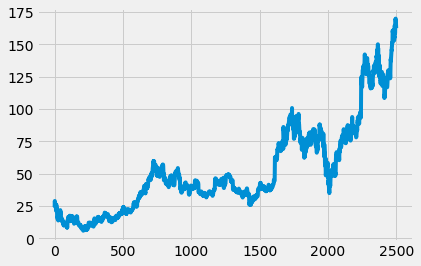

In [11]:
amaz=pd.read_csv("../input/amazonstock/124 AMZN.csv")
plt.plot(amaz['Adj Close'][:2500],label="amazon stock price")
amaz

In [12]:
amaz=amaz[:2500]
SMA20=pd.DataFrame()
SMA20['Adj Close']=amaz['Adj Close'].rolling(window=20).mean()
SMA100=pd.DataFrame()
SMA100['Adj Close']=amaz['Adj Close'].rolling(window=100).mean()
SMA20

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2495,159.602000
2496,160.027999
2497,160.516999
2498,161.092998


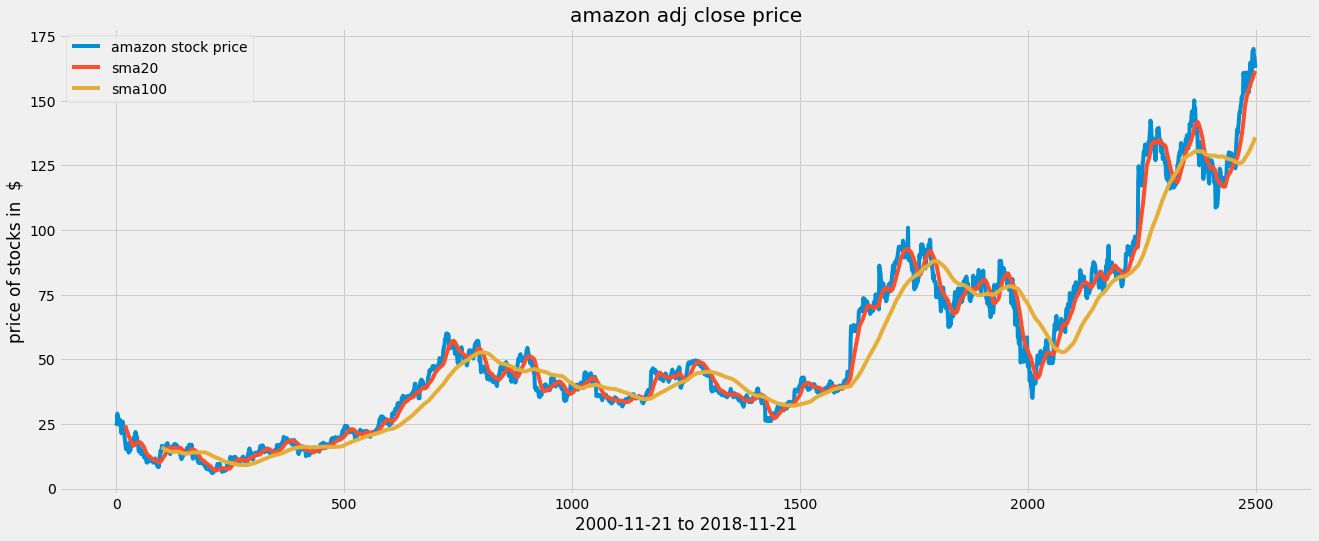

In [13]:
plt.figure(figsize=(20,8))
plt.plot(amaz['Adj Close'],label="amazon stock price")
plt.plot(SMA20['Adj Close'],label='sma20')
plt.plot(SMA100['Adj Close'],label='sma100')

plt.title('amazon adj close price')
plt.ylabel("price of stocks in  $")
plt.xlabel("2000-11-21 to 2018-11-21")
plt.legend(loc='upper left')
plt.show()

In [14]:
data=pd.DataFrame()
data['amazon']=amaz['Adj Close']
data['SMA20']=SMA20['Adj Close']
data['SMA100']=SMA100['Adj Close']
data

,amazon,SMA20,SMA100
0,24.250000,NaN,NaN
1,25.187500,NaN,NaN
2,28.937500,NaN,NaN
3,28.000000,NaN,NaN
4,25.031200,NaN,NaN
...,...,...,...
2495,169.949997,159.602000,134.0064
2496,167.509995,160.027999,134.4614
2497,166.839996,160.516999,134.9414
2498,165.229996,161.092998,135.4146


In [15]:
def buy_sell(data):
    sigpricebuy=[]
    sigpricesell=[]
    flag=-1
    
    for i in range(len(data)):
        if data['SMA20'][i]>data['SMA100'][i]:
            if flag!=1:
                sigpricebuy.append(data['amazon'][i])
                sigpricesell.append(np.nan)
                flag=1
            else:
                sigpricebuy.append(np.nan)
                sigpricesell.append(np.nan)
        elif data['SMA100'][i]>data['SMA20'][i]:
            if flag!=0:
                sigpricebuy.append(np.nan)
                sigpricesell.append(data['amazon'][i])
                flag=0
            else:
                sigpricebuy.append(np.nan)
                sigpricesell.append(np.nan)
        else:
            sigpricebuy.append(np.nan)
            sigpricesell.append(np.nan)
    return [sigpricebuy,sigpricesell]
    

In [16]:
buy_selld=buy_sell(data)
data['buy_now']=buy_selld[0]
data['sell_now']=buy_selld[1]

In [17]:
data

,amazon,SMA20,SMA100,buy_now,sell_now
0,24.250000,NaN,NaN,NaN,NaN
1,25.187500,NaN,NaN,NaN,NaN
2,28.937500,NaN,NaN,NaN,NaN
3,28.000000,NaN,NaN,NaN,NaN
4,25.031200,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2495,169.949997,159.602000,134.0064,NaN,NaN
2496,167.509995,160.027999,134.4614,NaN,NaN
2497,166.839996,160.516999,134.9414,NaN,NaN
2498,165.229996,161.092998,135.4146,NaN,NaN


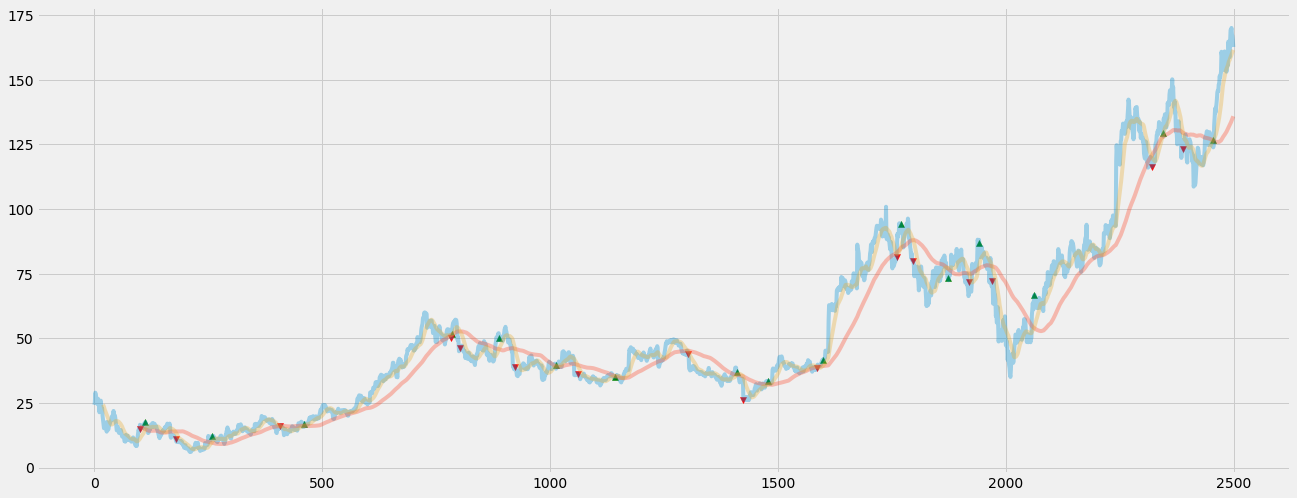

In [18]:
plt.figure(figsize=[20,8])
plt.plot(data['amazon'],label='amazon',alpha=0.35)
plt.plot(data['SMA100'],label='SMA100',alpha=0.35)
plt.plot(data['SMA20'],label='SMA20',alpha=0.35)
plt.scatter(data.index, data['buy_now'],label='buy',color='green',marker='^')
plt.scatter(data.index, data['sell_now'],label='sell',color='red',marker='v')

In [19]:
import pandas_datareader as pdr

In [20]:
key="3789523b7fbb8f459618f2223c5e597f3a5dc22b"

In [21]:
df=pdr.get_data_tiingo('NFLX',api_key=key)

In [22]:
df.to_csv('NFLX.csv')
df

close      high     low    open    volume  \
symbol date                                                                    
NFLX   2016-07-18 00:00:00+00:00   98.81   99.8400   97.24   98.43  28669659   
       2016-07-19 00:00:00+00:00   85.84   86.7500   84.50   85.43  55681209   
       2016-07-20 00:00:00+00:00   87.91   88.4900   85.82   86.67  23525141   
       2016-07-21 00:00:00+00:00   85.99   88.3800   85.21   88.30  16083996   
       2016-07-22 00:00:00+00:00   85.89   86.5000   85.11   86.48  11363917   
...                                  ...       ...     ...     ...       ...   
       2021-07-09 00:00:00+00:00  535.98  538.2600  528.58  531.00   2777231   
       2021-07-12 00:00:00+00:00  537.31  540.6497  532.92  540.30   1780738   
       2021-07-13 00:00:00+00:00  540.68  545.3300  535.76  535.76   2751593   
       2021-07-14 00:00:00+00:00  547.95  554.1000  541.01  541.01   4659535   
       2021-07-15 00:00:00+00:00  542.95  557.5399  538.20  553.97   5713873   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
NFLX   2016-07-18 00:00:00+00:00     98.81   99.8400   97.24    98.43   
       2016-07-19 00:00:00+00:00     85.84   86.7500   84.50    85.43   
       2016-07-20 00:00:00+00:00     87.91   88.4900   85.82    86.67   
       2016-07-21 00:00:00+00:00     85.99   88.3800   85.21    88.30   
       2016-07-22 00:00:00+00:00     85.89   86.5000   85.11    86.48   
...                                    ...       ...     ...      ...   
       2021-07-09 00:00:00+00:00    535.98  538.2600  528.58   531.00   
       2021-07-12 00:00:00+00:00    537.31  540.6497  532.92   540.30   
       2021-07-13 00:00:00+00:00    540.68  545.3300  535.76   535.76   
       2021-07-14 00:00:00+00:00    547.95  554.1000  541.01   541.01   
       2021-07-15 00:00:00+00:00    542.95  557.5399  538.20   553.97   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
NFLX   2016-07-18 00:00:00+00:00   28669659      0.0          1.0  
       2016-07-19 00:00:00+00:00   55681209      0.0          1.0  
       2016-07-20 00:00:00+00:00   23525141      0.0          1.0  
       2016-07-21 00:00:00+00:00   16083996      0.0          1.0  
       2016-07-22 00:00:00+00:00   11363917      0.0          1.0  
...                                     ...      ...          ...  
       2021-07-09 00:00:00+00:00    2777231      0.0          1.0  
       2021-07-12 00:00:00+00:00    1780738      0.0          1.0  
       2021-07-13 00:00:00+00:00    2751593      0.0          1.0  
       2021-07-14 00:00:00+00:00    4659535      0.0          1.0  
       2021-07-15 00:00:00+00:00    5713873      0.0          1.0  

[1258 rows x 12 columns]

In [23]:
df

close      high     low    open    volume  \
symbol date                                                                    
NFLX   2016-07-18 00:00:00+00:00   98.81   99.8400   97.24   98.43  28669659   
       2016-07-19 00:00:00+00:00   85.84   86.7500   84.50   85.43  55681209   
       2016-07-20 00:00:00+00:00   87.91   88.4900   85.82   86.67  23525141   
       2016-07-21 00:00:00+00:00   85.99   88.3800   85.21   88.30  16083996   
       2016-07-22 00:00:00+00:00   85.89   86.5000   85.11   86.48  11363917   
...                                  ...       ...     ...     ...       ...   
       2021-07-09 00:00:00+00:00  535.98  538.2600  528.58  531.00   2777231   
       2021-07-12 00:00:00+00:00  537.31  540.6497  532.92  540.30   1780738   
       2021-07-13 00:00:00+00:00  540.68  545.3300  535.76  535.76   2751593   
       2021-07-14 00:00:00+00:00  547.95  554.1000  541.01  541.01   4659535   
       2021-07-15 00:00:00+00:00  542.95  557.5399  538.20  553.97   5713873   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
NFLX   2016-07-18 00:00:00+00:00     98.81   99.8400   97.24    98.43   
       2016-07-19 00:00:00+00:00     85.84   86.7500   84.50    85.43   
       2016-07-20 00:00:00+00:00     87.91   88.4900   85.82    86.67   
       2016-07-21 00:00:00+00:00     85.99   88.3800   85.21    88.30   
       2016-07-22 00:00:00+00:00     85.89   86.5000   85.11    86.48   
...                                    ...       ...     ...      ...   
       2021-07-09 00:00:00+00:00    535.98  538.2600  528.58   531.00   
       2021-07-12 00:00:00+00:00    537.31  540.6497  532.92   540.30   
       2021-07-13 00:00:00+00:00    540.68  545.3300  535.76   535.76   
       2021-07-14 00:00:00+00:00    547.95  554.1000  541.01   541.01   
       2021-07-15 00:00:00+00:00    542.95  557.5399  538.20   553.97   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
NFLX   2016-07-18 00:00:00+00:00   28669659      0.0          1.0  
       2016-07-19 00:00:00+00:00   55681209      0.0          1.0  
       2016-07-20 00:00:00+00:00   23525141      0.0          1.0  
       2016-07-21 00:00:00+00:00   16083996      0.0          1.0  
       2016-07-22 00:00:00+00:00   11363917      0.0          1.0  
...                                     ...      ...          ...  
       2021-07-09 00:00:00+00:00    2777231      0.0          1.0  
       2021-07-12 00:00:00+00:00    1780738      0.0          1.0  
       2021-07-13 00:00:00+00:00    2751593      0.0          1.0  
       2021-07-14 00:00:00+00:00    4659535      0.0          1.0  
       2021-07-15 00:00:00+00:00    5713873      0.0          1.0  

[1258 rows x 12 columns]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


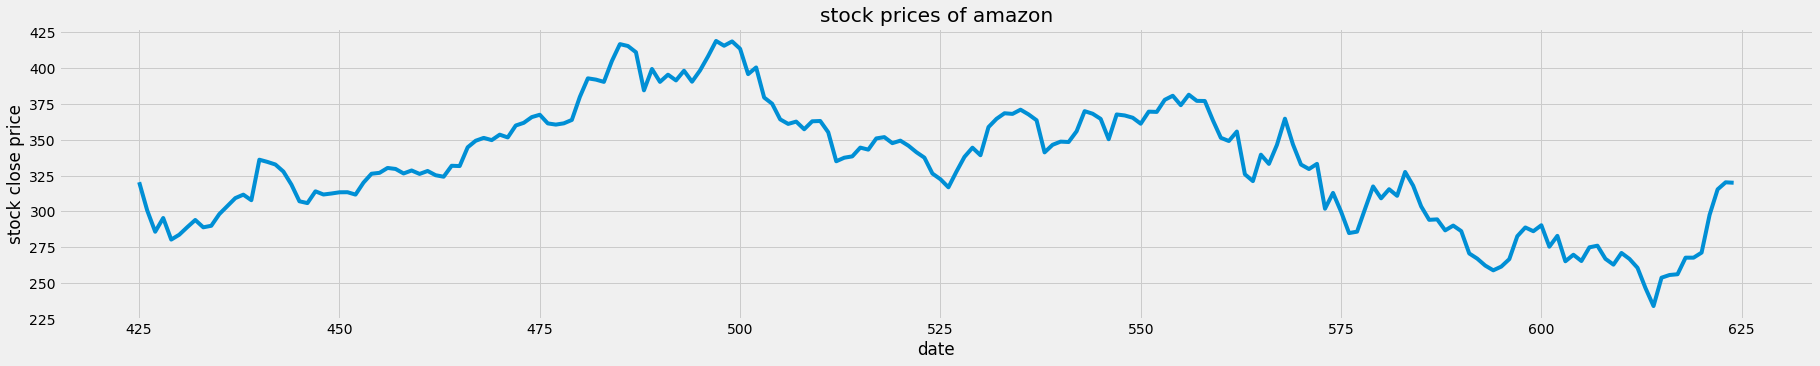

In [24]:
df=pd.read_csv("NFLX.csv")
df.describe()
data200=df[425:625]
data200['date']=data200['date'].apply(lambda x:x[6:10])
#visualizing the stock price of apple
plt.figure(figsize=(28,5))
plt.plot(data200.close,)
#plt.yticks(np.arange(.min(), y.max(), 0.005))
plt.xlabel('date')
plt.ylabel('stock close price')
plt.title('stock prices of amazon')
plt.show()

In [25]:
#calculating the retracement levels from the difference in maximum and minium values of the data in 100 days
min_price=data200["close"].min()
max_price=data200["close"].max()
diff=max_price-min_price
first_level=max_price-diff*.235
second_level=max_price-diff*0.382
third_level=max_price-diff*0.6179
fourth_level=min_price
min_price

233.88

In [26]:
#calculate the MACD line and the signal line indicators
#calculation of short term and long term moving averaege
shortEMA=data200.close.ewm(span=15,adjust=False).mean()
longEMA=data200.close.ewm(span=30,adjust=False).mean()
#calculation of MACD 
MACD=shortEMA - longEMA
#calculation of the signal line
signal=MACD.ewm(span=10,adjust=False).mean()

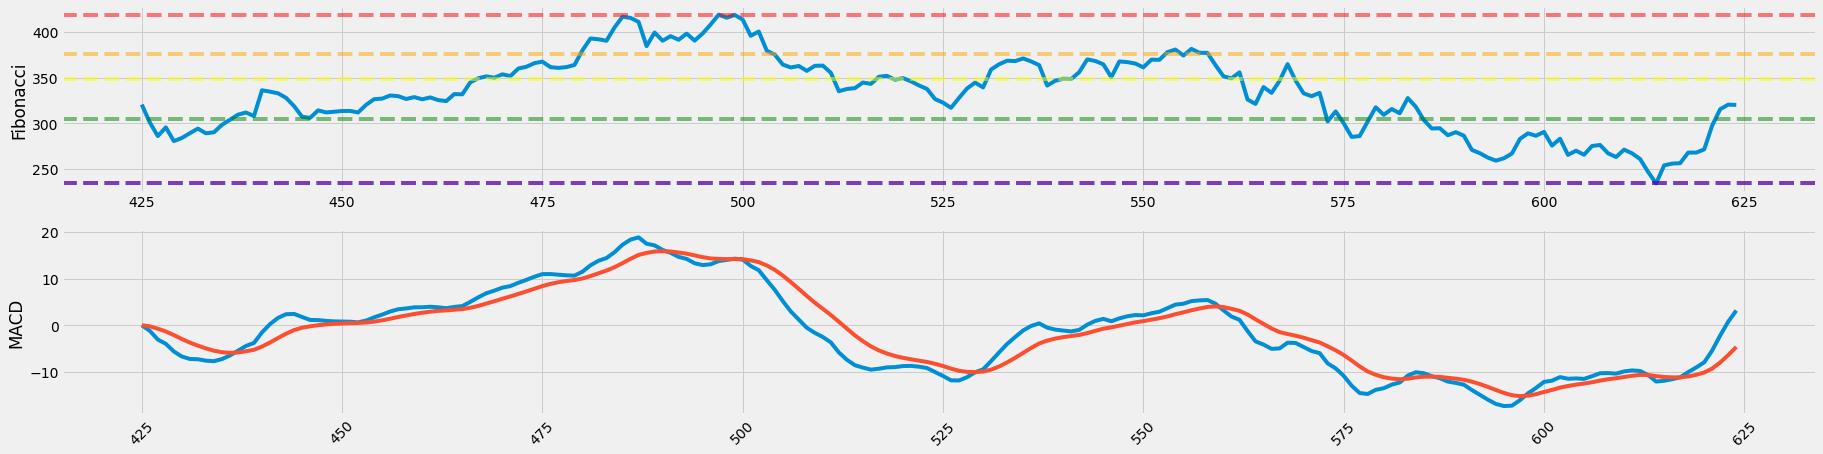

In [27]:
#plotting fibonacci retracement graph

plt.figure(figsize=(28,7))
plt.subplot(2,1,1)
plt.plot(data200['close'])
plt.axhline(max_price,linestyle='--',alpha=0.5,color='red')
plt.axhline(first_level,linestyle='--',alpha=0.5,color='orange')
plt.axhline(second_level,linestyle='--',alpha=0.5,color='yellow')
plt.axhline(third_level,linestyle='--',alpha=0.5,color='green')
plt.axhline(fourth_level,linestyle='--',alpha=0.5,color='blue')
plt.axhline(min_price,linestyle='--',alpha=0.5,color='purple')
plt.ylabel('Fibonacci')

#plot the macd line and the signal line
plt.subplot(2,1,2)
plt.plot(MACD)
plt.plot(signal)
plt.ylabel("MACD")
plt.xticks(rotation=45)
plt.savefig("pic.png")

In [28]:
amaz

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-11-21,26.625000,26.875000,23.625000,24.250000,24.250000,6197500
1,2000-11-22,23.875000,27.500000,22.125000,25.187500,25.187500,11877100
2,2000-11-24,26.421801,29.125000,26.062500,28.937500,28.937500,7639300
3,2000-11-27,29.750000,30.750000,27.000000,28.000000,28.000000,6411400
4,2000-11-28,26.000000,26.187500,24.625000,25.031200,25.031200,11327500
...,...,...,...,...,...,...,...
2495,2010-10-26,167.570007,171.000000,167.500000,169.949997,169.949997,4689600
2496,2010-10-27,168.910004,169.750000,166.539993,167.509995,167.509995,5721800
2497,2010-10-28,168.309998,168.490005,165.050003,166.839996,166.839996,4684400
2498,2010-10-29,165.800003,168.500000,164.809998,165.229996,165.229996,4998500
